# Glass type Prediction

# Introduction

  Glass prediction model is a machine learning based frame work which will predict different criterias of the glasses depending on the input provided to the model.

# Goal
The goal of this project is to build a machine learning model with high accuracy,which will predict the glasses based on the given inputs.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
glass_df = pd.read_csv("E:\\Python\\New folder\\22 projects\\1.Gla Type\\glass.csv")

In [3]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [4]:
glass_df.shape

(214, 10)

In [5]:
glass_df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type     object
dtype: object

In [6]:
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass_df['Type'][1]

"'vehic wind float'"

In [8]:
# Encoding the type column 
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
glass_df['Type'] = le.fit_transform(glass_df['Type'])

In [9]:
glass_df['Type']

0      0
1      2
2      0
3      5
4      1
      ..
209    2
210    1
211    1
212    1
213    5
Name: Type, Length: 214, dtype: int32

In [10]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,0
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,2
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,0
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,5
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,1


In [11]:
le.classes_

array(["'build wind float'", "'build wind non-float'",
       "'vehic wind float'", 'containers', 'headlamps', 'tableware'],
      dtype=object)

In [12]:
glass_df['Type'].value_counts()

1    76
0    70
4    29
2    17
3    13
5     9
Name: Type, dtype: int64

C:\Users\intel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

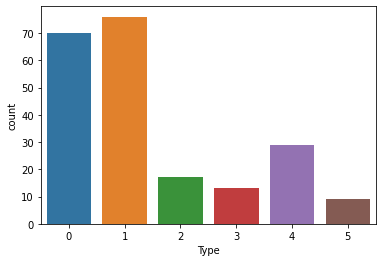

In [13]:
sns.countplot(glass_df['Type'])

In [14]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,0
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,2
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,0
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,5
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,1


<AxesSubplot:>

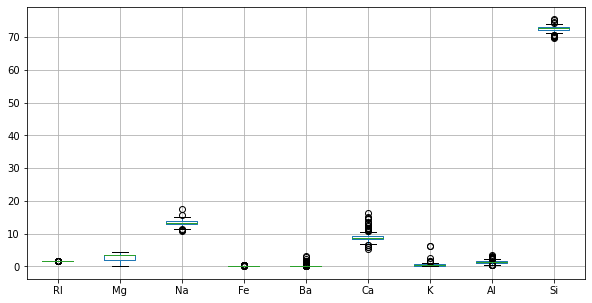

In [15]:
# Check the outliers for the other columns
fig = plt.figure(figsize=(10,5))
glass_df.boxplot(column = ['RI','Mg','Na','Fe','Ba','Ca','K','Al','Si'])

In [16]:
glass_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.159630
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.493272
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.705058
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.533456
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.150354
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.026368
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.026764
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.479113
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.180434
Type,-0.159630,0.493272,-0.705058,0.533456,0.150354,-0.026368,0.026764,0.479113,-0.180434,1.000000


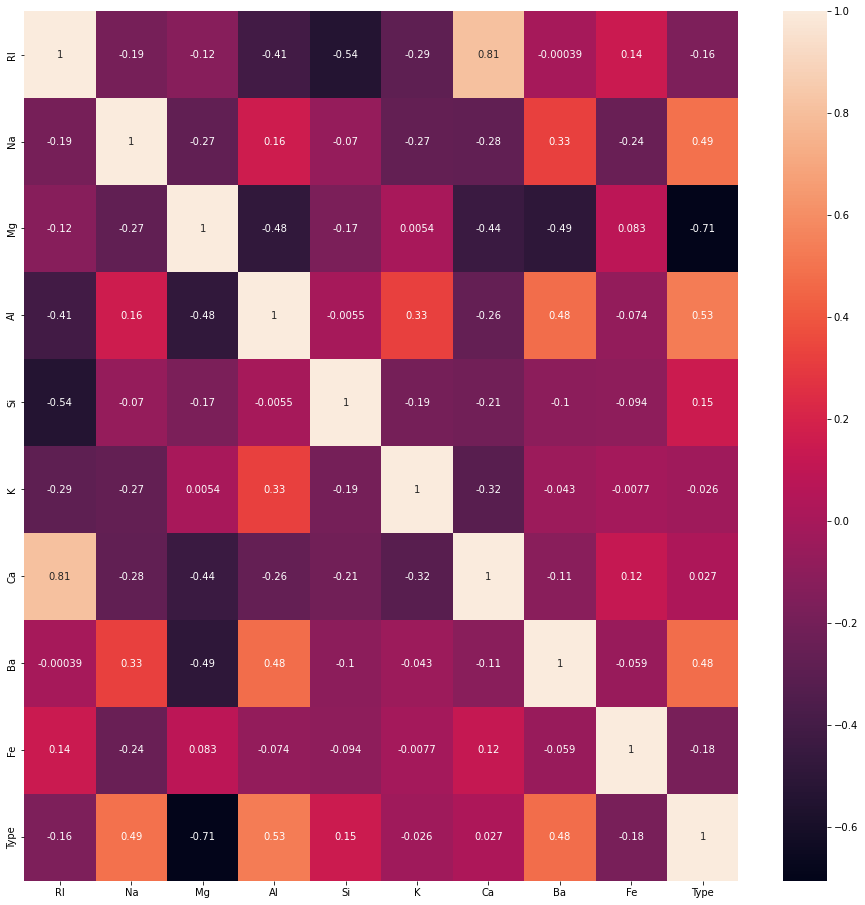

In [17]:
corrmat = glass_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))

graph = sns.heatmap(glass_df[top_corr_features].corr(),annot=True)

In [18]:
# Define x and y
x = glass_df.iloc[:,:9]

In [19]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24
...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00


In [20]:
y = glass_df.iloc[:,-1]

In [21]:
y

0      0
1      2
2      0
3      5
4      1
      ..
209    2
210    1
211    1
212    1
213    5
Name: Type, Length: 214, dtype: int32

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# Make train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [37]:
#1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logict = LogisticRegression(multi_class="multinomial")
logict.fit(x_train,y_train)
y_pred1 = logict.predict(x_test)
print(logict.score(x_test,y_test))

0.5211267605633803


In [38]:
#2. KNN Neghbour Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
print(knn.score(x_test,y_test))

0.7887323943661971


In [70]:
#3. Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=101)
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
print(rfc.score(x_test,y_test))

0.7887323943661971


In [60]:
rfc_param_dist = {
    'n_estimators':[80,90,100,150,200],
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,None],
    'min_samples_split':[2,3,None]  
}

In [61]:
from sklearn.model_selection import GridSearchCV
grid_rfc = GridSearchCV(rfc, param_grid=rfc_param_dist, cv=10,n_jobs=-1)

In [62]:
grid_rfc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_split': [2, 3, None],
                         'n_estimators': [80, 90, 100, 150, 200]})

In [63]:
print(grid_rfc.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       n_estimators=80)


In [65]:
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)

0.7495238095238095
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 80}


In [ ]:
# 4. Gradient Boosting

In [52]:
params = {'n_estimators': 570,
         'max_depth': 3,
         'min_samples_split':7,
         'learning_rate': 0.01,
         'loss':'ls'}

In [53]:

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(**params)
gbr.fit(x_train,y_train)
y_pred4 = gbr.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE:',mean_absolute_error(y_test,y_pred4))
print('MSE:',mean_squared_error(y_test,y_pred4))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred4)))
print('r2_score:',r2_score(y_test,y_pred4))

MAE: 0.6284580367253313
MSE: 0.942632690277217
RMSE: 0.9708927285118665
r2_score: 0.6588792970791492


In [46]:
# Check best score using hyper parameter tunnig
param_dist = {
    'n_estimators':[300,400,500,600],
    'max_depth':[3,4,5,None],
    'min_samples_split':[2,3,4,5,None],
    'learning_rate':[0.01,0.1]    
}

In [47]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(gbr, param_grid=param_dist, cv=10,n_jobs=-1)

In [48]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 4, 5, None],
                         'min_samples_split': [2, 3, 4, 5, None],
                         'n_estimators': [300, 400, 500, 600]})

In [49]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=4,
                          n_estimators=600)

In [50]:
grid.best_score_

0.4533531838230408

In [51]:
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 4,
 'n_estimators': 600}

In [55]:
y_pred4

array([0.17925667, 0.27379084, 3.39145641, 0.23400974, 1.47890876,
       0.39244952, 1.17876394, 4.8336912 , 1.24933864, 0.90984276,
       1.59784087, 1.25715178, 2.25338258, 1.7516642 , 0.06690959,
       0.83352177, 3.7099914 , 3.99307533, 4.25806809, 0.14980949,
       0.76627369, 1.69746308, 0.4596169 , 1.19107544, 0.52023871,
       0.34038838, 1.20779157, 0.16215937, 0.05898552, 0.76791318,
       0.87454395, 2.8591905 , 0.67284988, 0.52316332, 1.12647951,
       0.85965792, 0.83843769, 0.12514381, 0.2186432 , 1.73060554,
       0.56272539, 0.44497475, 1.56474612, 1.96252029, 0.91909744,
       0.89381174, 1.94900097, 3.89218401, 0.25869631, 3.87361197,
       1.71268719, 1.57193848, 0.06690959, 0.50709015, 3.27170462,
       0.7964573 , 2.96294884, 0.85231646, 0.71592187, 0.72148649,
       1.12197656, 0.79696943, 1.34370185, 4.00084233, 4.03051508,
       0.83279984, 0.11473456, 0.77508154, 0.08402237, 0.33045968,
       0.56893679])